In [1]:
!pip install pmdarima

  Using cached pmdarima-2.0.2-cp38-cp38-win_amd64.whl (571 kB)


In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [2]:
df=pd.read_csv('bitcoin.csv',index_col='Date')  

df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
7/18/2010,0.0,0.1,0.1,0.1,75,USD
7/19/2010,0.1,0.1,0.1,0.1,574,USD
7/20/2010,0.1,0.1,0.1,0.1,262,USD
7/21/2010,0.1,0.1,0.1,0.1,575,USD
7/22/2010,0.1,0.1,0.1,0.1,2160,USD


In [3]:
df.index = pd.to_datetime(df.index) 
df.index

DatetimeIndex(['2010-07-18', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23', '2010-07-24', '2010-07-25',
               '2010-07-26', '2010-07-27',
               ...
               '2022-08-14', '2022-08-15', '2022-08-16', '2022-08-17',
               '2022-08-18', '2022-08-19', '2022-08-20', '2022-08-21',
               '2022-08-22', '2022-08-23'],
              dtype='datetime64[ns]', name='Date', length=4420, freq=None)

In [4]:
ts=df['Close'] 
ts.head() 

Date
2010-07-18    0.1
2010-07-19    0.1
2010-07-20    0.1
2010-07-21    0.1
2010-07-22    0.1
Name: Close, dtype: float64

Text(0, 0.5, 'Close Prices')

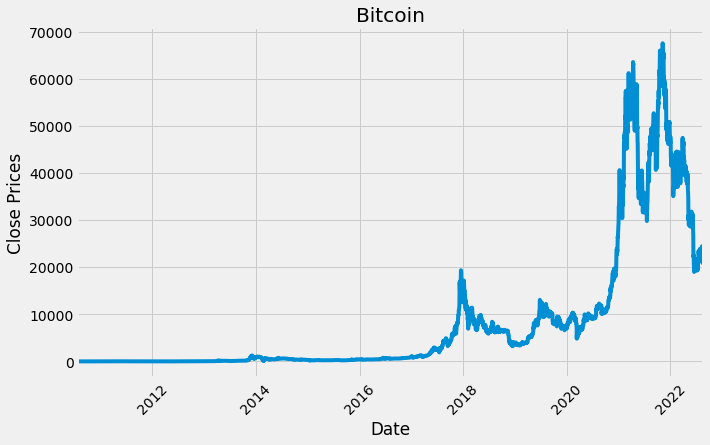

In [6]:
plt.rcParams['axes.unicode_minus'] = False  
ts.plot()         
plt.title("Bitcoin") 
plt.xticks(rotation=45)    
plt.xlabel('Date')   
plt.ylabel('Close Prices')

<AxesSubplot:ylabel='Density'>

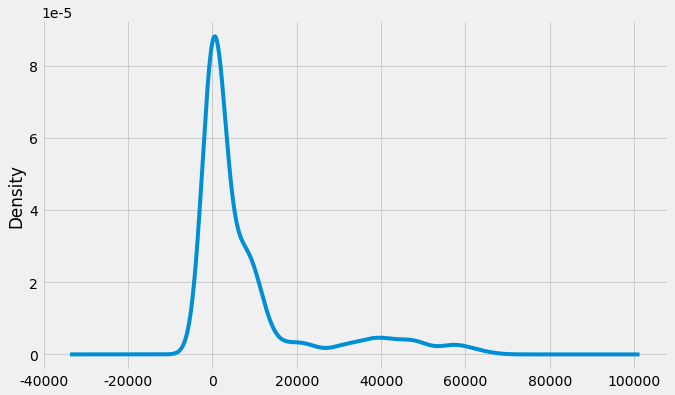

In [7]:
#Distribution of the dataset
ts.plot(kind='kde')

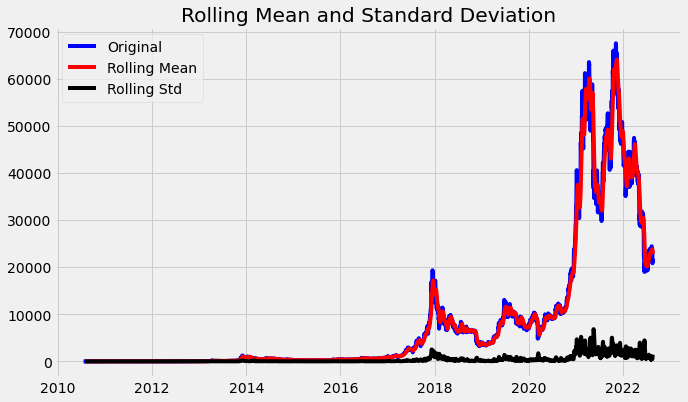

Results of dickey fuller test
Test Statistics                  -1.750985
p-value                           0.405053
No. of lags used                 31.000000
Number of observations used    4388.000000
critical value (1%)              -3.431841
critical value (5%)              -2.862199
critical value (10%)             -2.567121
dtype: float64


In [8]:
# Test for stationarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(ts)

Through the above graph, we can see the varying mean and standard deviation and hence our series is not stationary.

We see that the p-value is greater than 0.05 so we cannot reject the null hypothesis. Also, the test statistics is greater than the critical values. All these justification lead to the conclusion that the series is not stationary.

<Figure size 720x432 with 0 Axes>

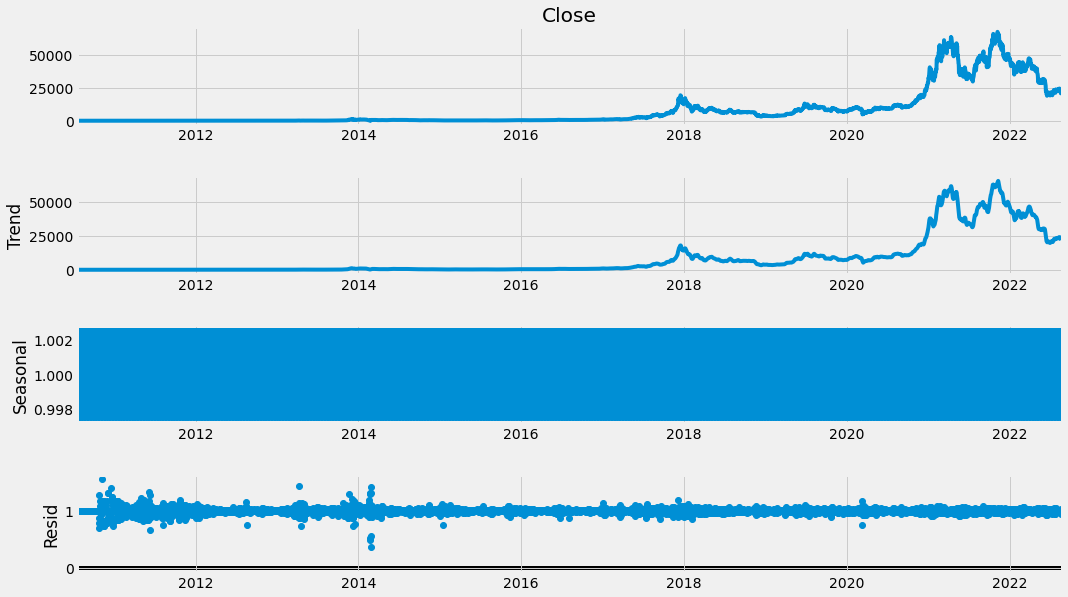

In [9]:
#To separate the trend and the seasonality from a time series, we decompose the series as follows.
result = seasonal_decompose(ts, model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


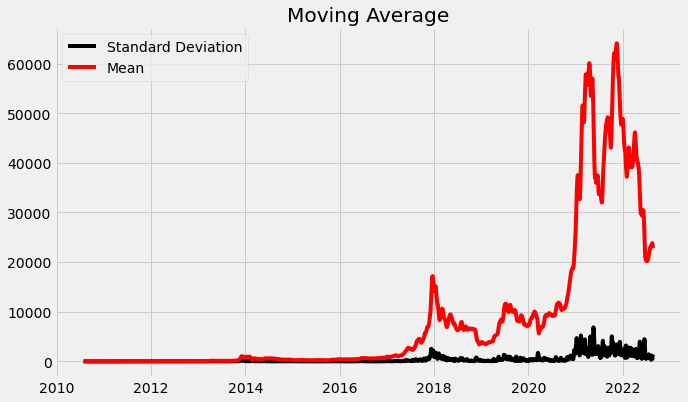

In [5]:
# Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
moving_avg = ts.rolling(12).mean()
std_dev = ts.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

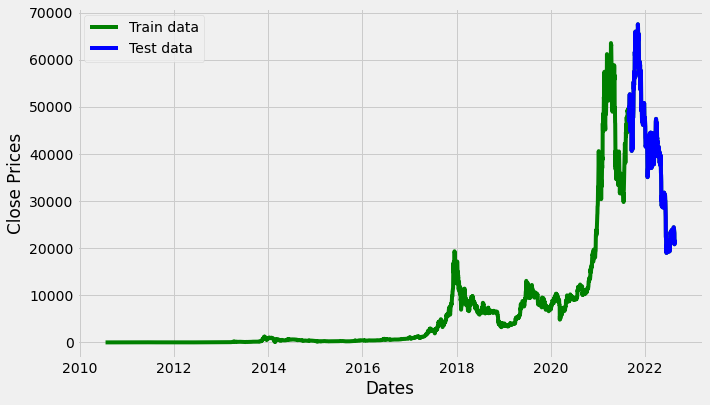

In [12]:
# split data into train and training set
train_data, test_data = ts[:pd.to_datetime('2021-08-27')], ts[pd.to_datetime('2021-08-27'):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(ts, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=62382.298, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=62364.424, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=62367.088, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=62382.435, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=62345.042, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=62340.681, Time=0.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=62341.074, Time=1.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=62339.991, Time=0.80 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=62355.480, Time=0.82 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=62341.353, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=62339.419, Time=0.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=62343.128, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=62341.373, Time=1.57 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=62341.121, Time=0.46 sec
 ARIMA(2,1,3)(0,0,0

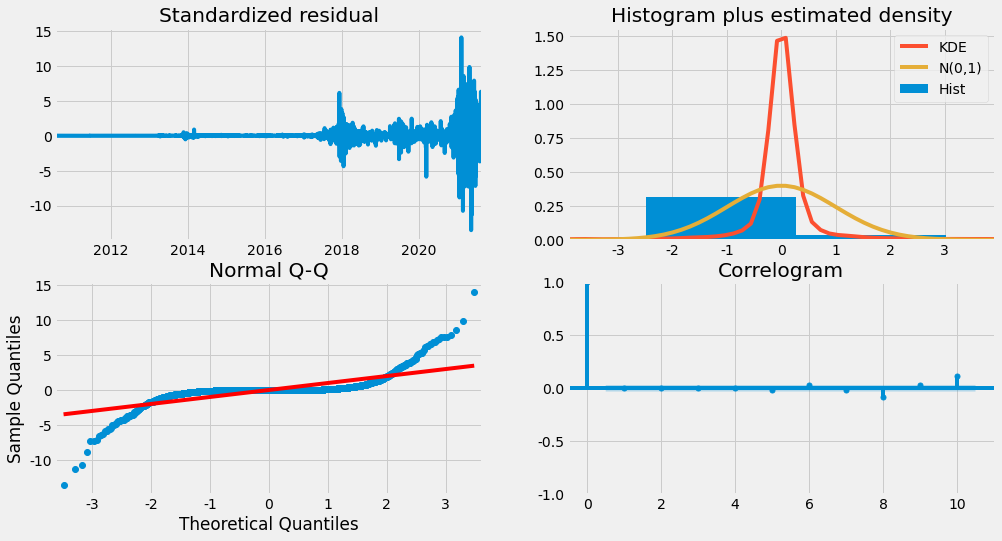

In [13]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

interpret:

Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.

Top Right: The density plot suggest normal distribution with mean zero.

Bottom left: All the dots should fall perfectly in line with the red line. 

Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. 

Overall, it seems to be a good fit. then we start forecasting the stock prices.

In [14]:
# Build Model
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train_data, order=model_autoARIMA.order)
fitted = model.fit()

print(fitted.summary())

C:\Users\86173\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\86173\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\86173\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4059
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -31165.132
Date:                Sat, 03 Dec 2022   AIC                          62338.265
Time:                        00:12:23   BIC                          62363.499
Sample:                    07-18-2010   HQIC                         62347.203
                         - 08-27-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4481      0.040     11.094      0.000       0.369       0.527
ar.L2          0.1102      0.004     24.988      0.000       0.102       0.119
ma.L1         -0.5166      0.041    -12.740      0.0

In [15]:
close_pred = fitted.forecast(test_data.size, alpha=0.05)
close_pred

2021-08-28    48771.066642
2021-08-29    48885.754693
2021-08-30    48904.826869
2021-08-31    48926.014065
2021-09-01    48937.610270
                  ...     
2022-08-20    48957.556307
2022-08-21    48957.556307
2022-08-22    48957.556307
2022-08-23    48957.556307
2022-08-24    48957.556307
Freq: D, Name: predicted_mean, Length: 362, dtype: float64

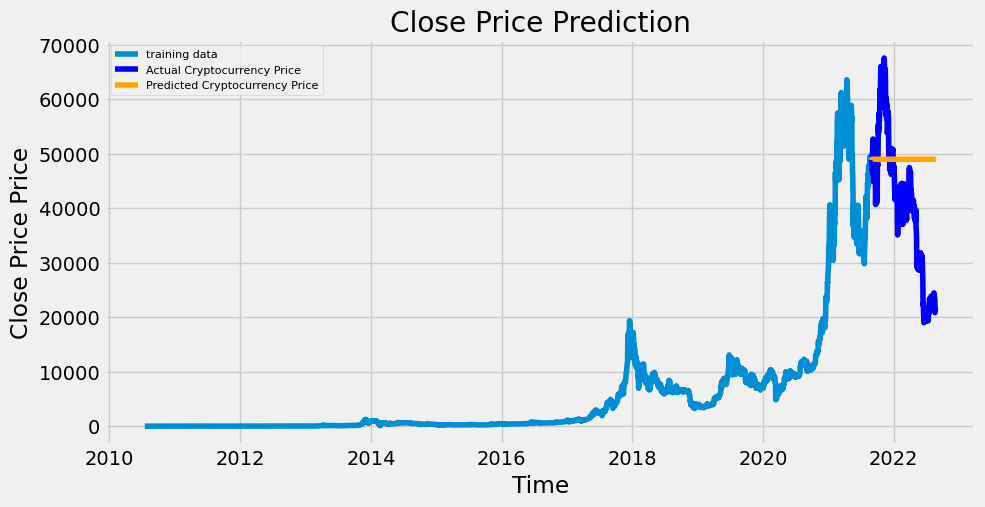

In [48]:
# plot results

close_pred_series = pd.Series(close_pred, index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Cryptocurrency Price')
plt.plot(close_pred_series, color = 'orange',label='Predicted Cryptocurrency Price')

plt.title('Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [49]:
# report performance

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(test_data, close_pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, close_pred)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, close_pred))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(close_pred - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 231337464.59933236
MAE: 12279.67948821461
RMSE: 15209.781872181216
MAPE: 0.4223166773488528
